In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset Exploration:
* Download the Iris dataset.
* Use Python libraries like pandas and NumPy to load and explore the dataset.
* Perform basic data cleaning and preprocessing tasks (e.g., handling missing values, converting data types).
* Generate basic descriptive statistics (mean, median, standard deviation) for the dataset.

In [2]:
# Unzipping the Iris dataset folder downloaded from https://archive.ics.uci.edu/dataset/53/iris
!unzip iris.zip

Archive:  iris.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [3]:
# Reading the dataset into Pandas dataframe, using the attributes as column names
data=pd.read_csv("/content/iris.data",names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [4]:
# Inspecting the first few rows of the dataset
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# All column types accounted for.

In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [8]:
# No missing values found.

In [9]:
# Check for duplicates and remove them.
print(data.duplicated().sum())
data = data.drop_duplicates()


3


In [10]:
# Descriptive Analysis
print("\nDescriptive statistics:")
print(data.describe())



Descriptive statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# 2. Data Visualization:
* Create visualizations (e.g., histograms, scatter plots, box plots) using libraries like matplotlib or seaborn to understand the data distribution and relationships between variables.


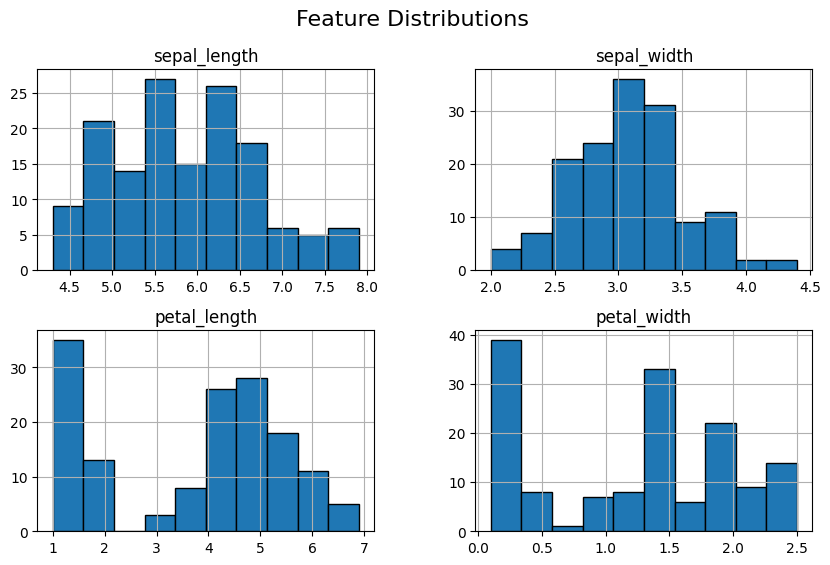

In [11]:
# Plotting histograms.
data.hist(bins=10, figsize=(10, 6), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

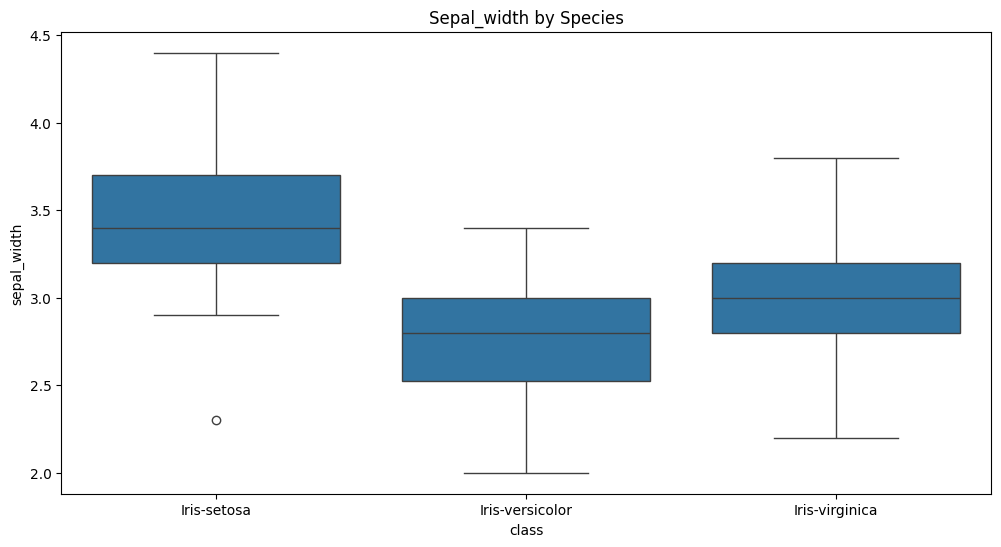

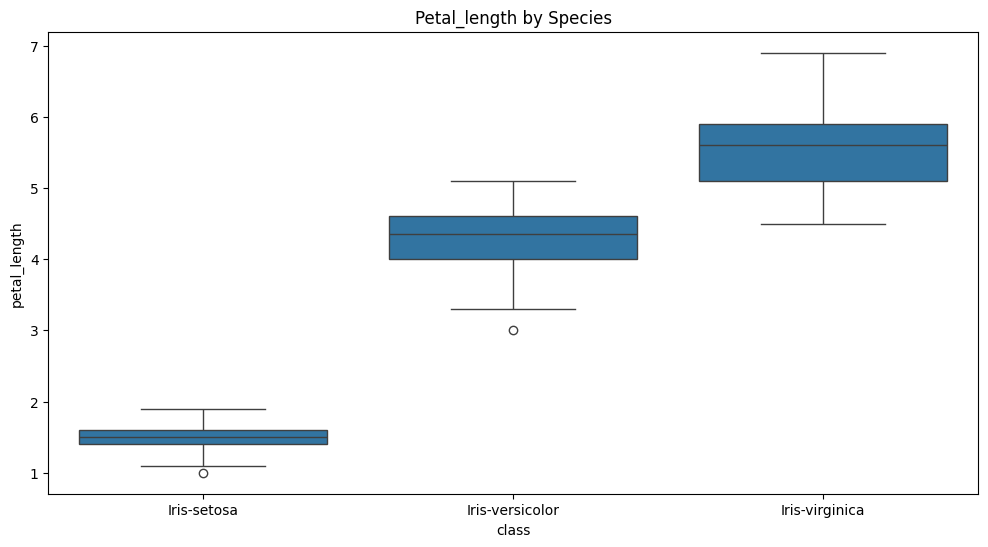

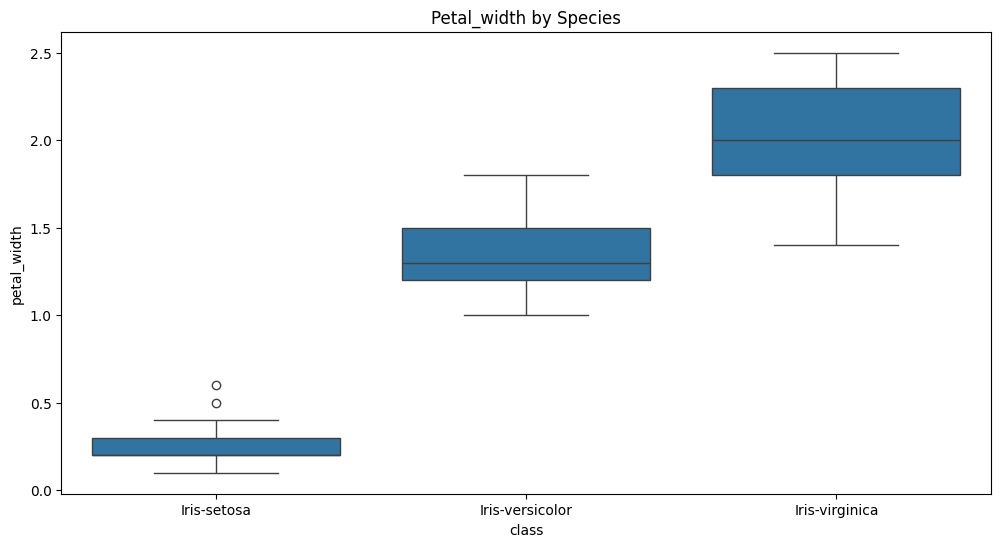

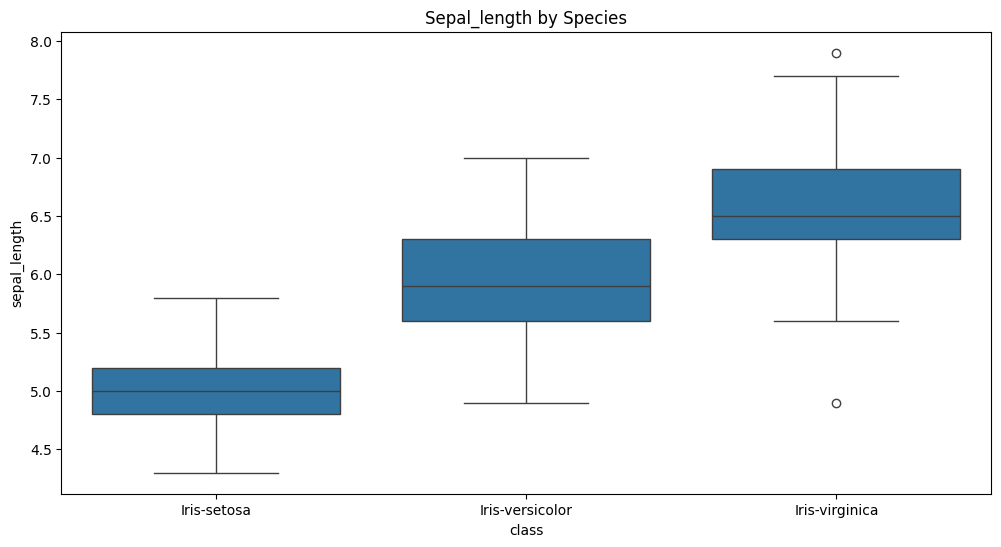

In [12]:
# Boxplot for all features
features = ['sepal_width', 'petal_length', 'petal_width','sepal_length']
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='class', y=feature)
    plt.title(f'{feature.capitalize()} by Species')
    plt.show()


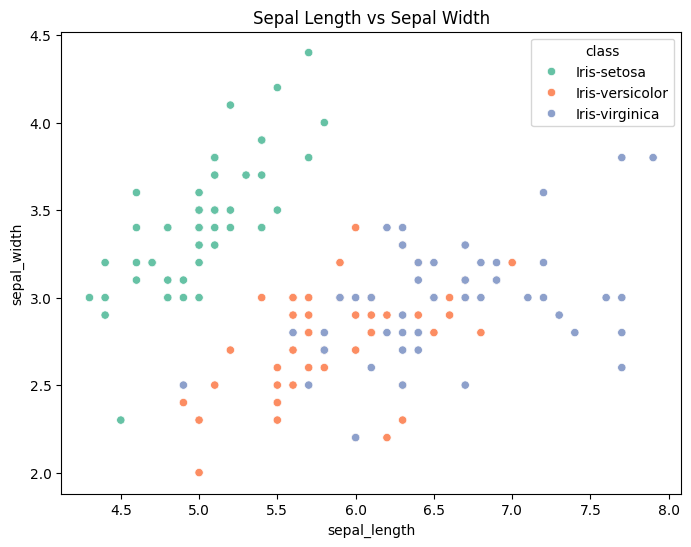

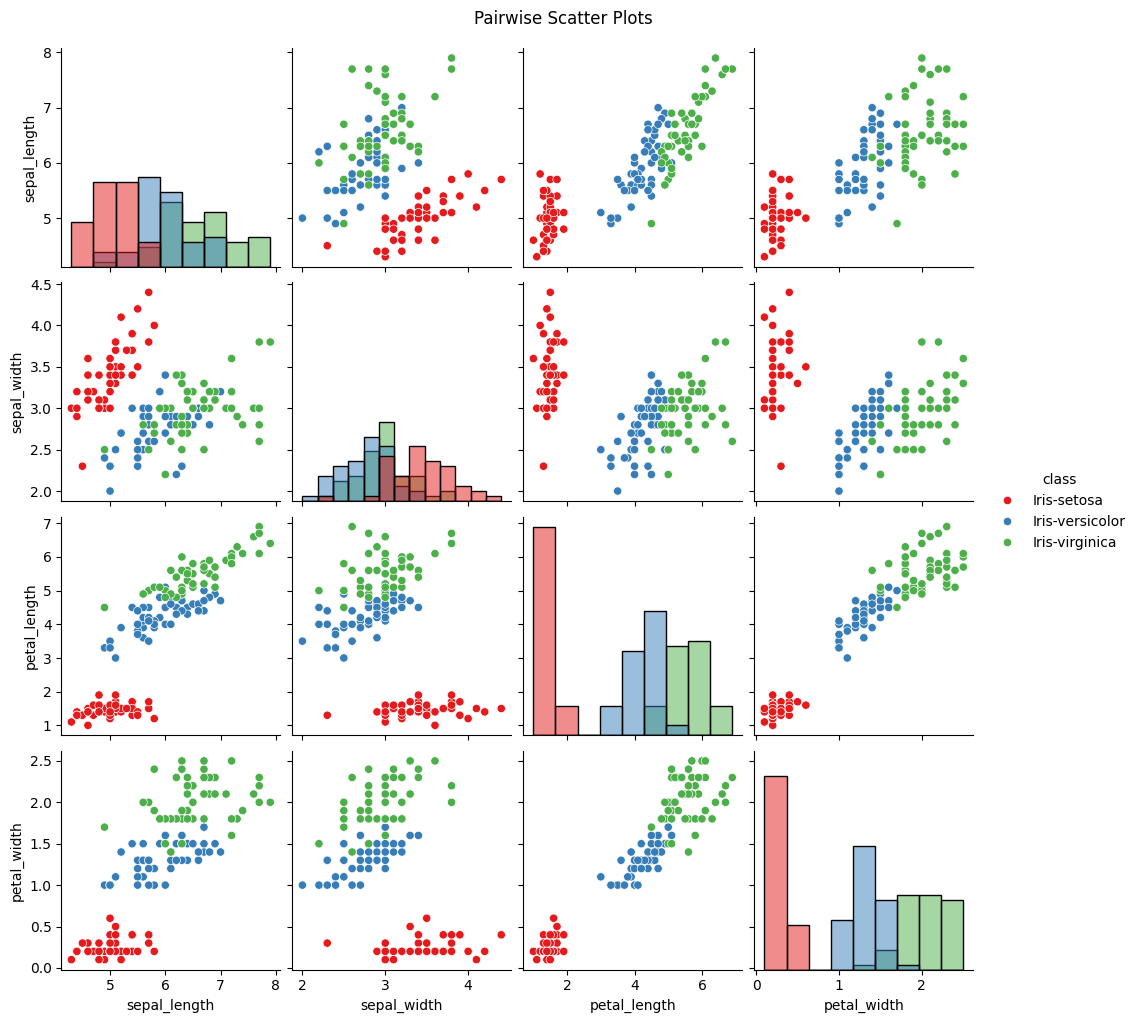

In [13]:
# Scatter plot for two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='class', palette='Set2')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Pairwise scatter plots for all features
sns.pairplot(data, hue='class', palette='Set1', diag_kind='hist', height=2.5)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()


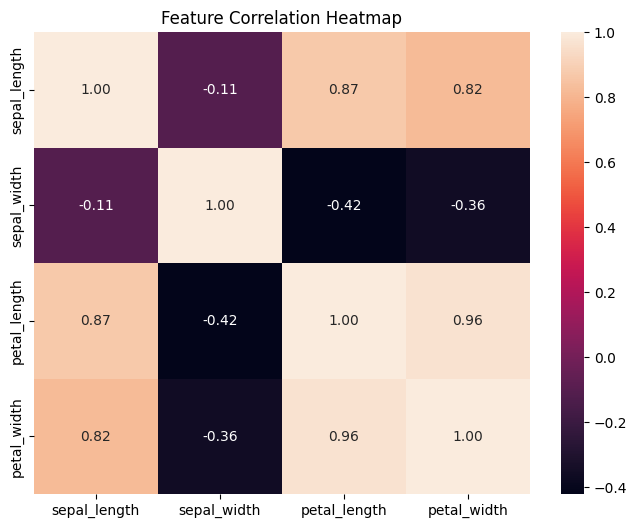

In [14]:
# Compute correlation matrix
correlation_matrix = data.iloc[:, :-1].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


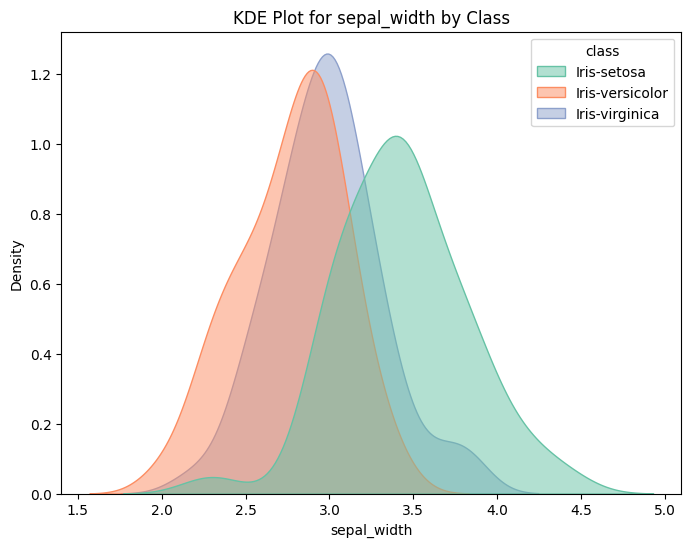

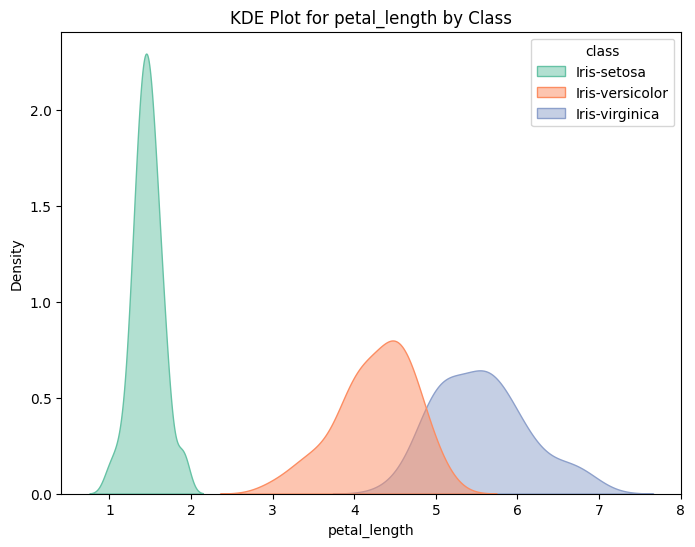

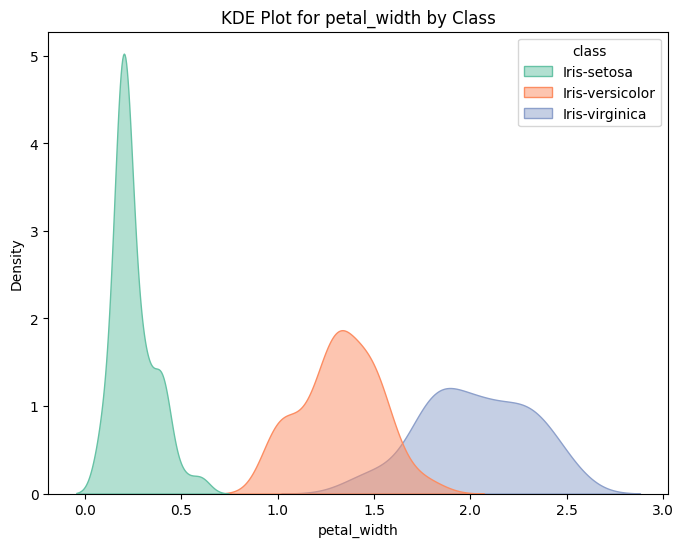

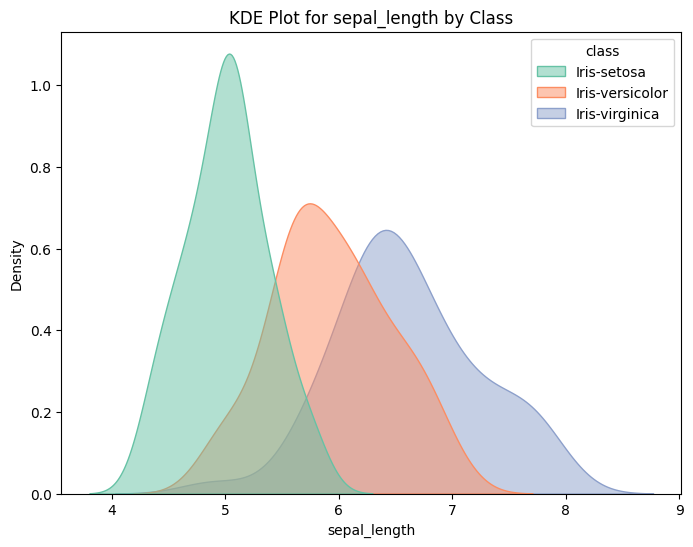

In [15]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=feature, hue='class', fill=True, common_norm=False, alpha=0.5, palette='Set2')
    plt.title(f'KDE Plot for {feature} by Class')
    plt.show()

# 3. Data Analysis (Optional):
* If applicable, perform a simple exploratory data analysis (EDA).
* This could include identifying potential correlations between variables, identifying outliers, or making initial observations about the data.

In [16]:
# Perform Pearson correlation test
from scipy.stats import pearsonr
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        feature1 = features[i]
        feature2 = features[j]

        # Calculate Pearson correlation and p-value
        corr, p_value = pearsonr(data[feature1], data[feature2])

        # Print the results
        print(f"Pearson Correlation Test between {feature1} and {feature2}:")
        print(f"Correlation coefficient: {corr:.4f}, p-value: {p_value:.4f}")

        # Interpret the p-value
        if p_value < 0.05:
            print("Reject the null hypothesis: There is a significant correlation between the features.")
        else:
            print("Fail to reject the null hypothesis: There is no significant correlation between the features.")

        print("-" * 50)

Pearson Correlation Test between sepal_length and sepal_width:
Correlation coefficient: -0.1093, p-value: 0.1875
Fail to reject the null hypothesis: There is no significant correlation between the features.
--------------------------------------------------
Pearson Correlation Test between sepal_length and petal_length:
Correlation coefficient: 0.8713, p-value: 0.0000
Reject the null hypothesis: There is a significant correlation between the features.
--------------------------------------------------
Pearson Correlation Test between sepal_length and petal_width:
Correlation coefficient: 0.8171, p-value: 0.0000
Reject the null hypothesis: There is a significant correlation between the features.
--------------------------------------------------
Pearson Correlation Test between sepal_width and petal_length:
Correlation coefficient: -0.4211, p-value: 0.0000
Reject the null hypothesis: There is a significant correlation between the features.
-----------------------------------------------